# Importing libraries

In [94]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')
import nltk
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
import matplotlib.pyplot as plt
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tejasrikurapati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tejasrikurapati/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Importing dataset

In [ ]:
tweets = pd.read_csv('./tweets.csv')
tweets.drop(['Unnamed: 0', 'detect'], axis=1) #removing unnamed column

# Cleaning data 

The data is being pre-processed by lemmatizing, stop word removal and special character removal

In [47]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer() 
    stopwords = nltk.corpus.stopwords.words('english') 
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [62]:
words = basic_clean(''.join(str(tweets['Column'].tolist())))

# N-Gram analysis 

In [88]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[20:30]

In [89]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[20:30]

Text(0.5, 0, '# of Occurances')

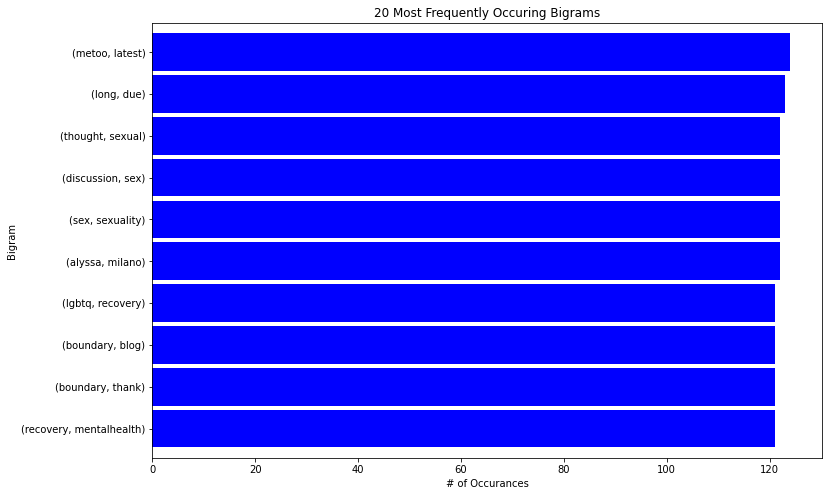

In [90]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

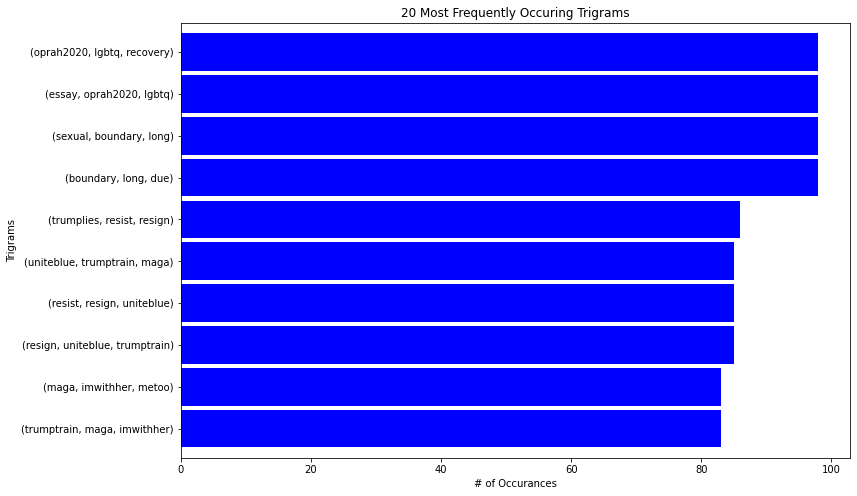

In [91]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigrams')
plt.xlabel('# of Occurances')